# Random Forest Model

- First Model : 0.8156424581005587 (replaced Nan age with average)
- Second Model: 0.8046511627906977 (Dropped Nan age)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv("./titanic.csv", delimiter=",")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data = data.drop(labels=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis="columns")
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [61]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [62]:
data.Age = data.Age.fillna(data.Age.mean())
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


<AxesSubplot:xlabel='Age', ylabel='Survived'>

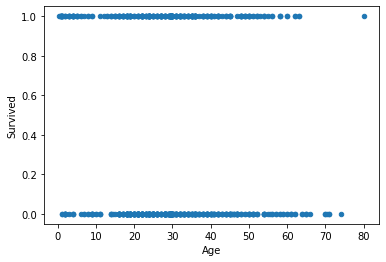

In [63]:
data.plot.scatter("Age", "Survived") #Age is not a feature

In [64]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [65]:
dummies = pd.get_dummies(data.Sex)
dummies = dummies.drop("female", axis="columns")
dummies

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [66]:
data = pd.concat([data.drop("Sex", axis="columns"), dummies], axis="columns")
data.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [67]:
X = data.drop("Survived", axis="columns")
y = data.Survived

In [68]:
X

,Pclass,Age,Fare,male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test)

(712, 179)

## Model (With Mean Age)

In [70]:
model = RandomForestClassifier(n_estimators=100)

In [71]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
model.score(X_test, y_test)

0.8156424581005587

Text(69.0, 0.5, 'truth')

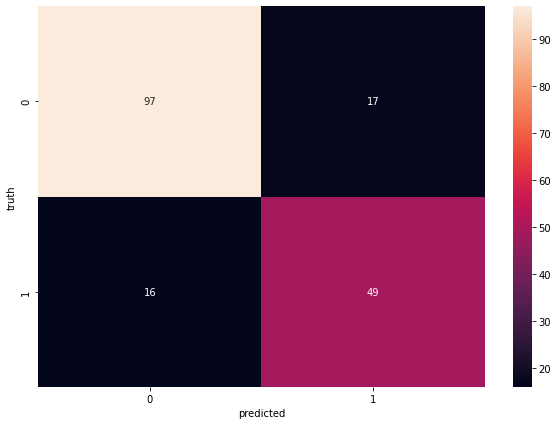

In [73]:
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       114
           1       0.74      0.75      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [75]:
data = pd.read_csv("./titanic.csv", delimiter=",").drop(labels=["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis="columns")


In [76]:
data = pd.concat([data.drop("Sex", axis="columns"), dummies], axis="columns")
data.head()


,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [77]:
data.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
male          0
dtype: int64

In [78]:
data = data.dropna()
data.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [79]:
data.reset_index(drop=True)
len(data)

714

In [80]:
data.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
male        0
dtype: int64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Survived", axis="columns"), data.Survived,  test_size=0.3)
len(X_train), len(X_test)

(499, 215)

## Model (With Dropped Empty Age)

In [82]:


model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8046511627906977

Text(69.0, 0.5, 'truth')

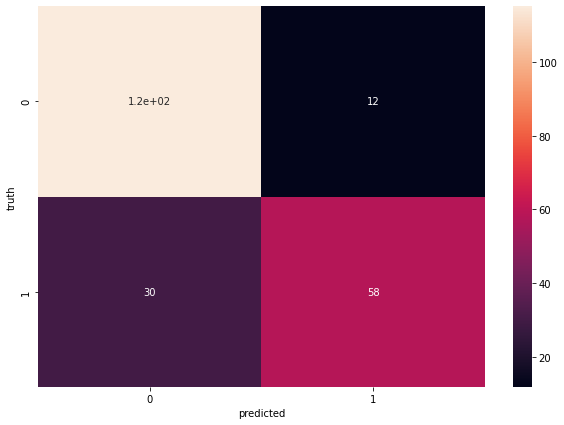

In [83]:
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")